In [24]:
import pandas as pd
import numpy as np
import os
import sys
import random
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
# to play the audio files
from IPython.display import Audio
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional
#from keras.utils import np_utils
#from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [25]:
Features = pd.read_csv('/content/New_Features.csv')
Features

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,labels
0,-667.117126,79.265198,0.214563,14.969451,8.738843,1.614774,-1.532764,-7.318048,-9.807106,-5.784626,...,-2.586592,-4.365417,-3.526464,-3.893123,-1.308869,-1.534479,0.177820,-1.924504,-0.712043,male_neutral
1,-615.445834,66.686741,2.038200,12.995424,7.055977,0.668474,-2.428976,-7.810624,-9.911508,-5.906373,...,-2.932330,-4.386004,-4.143258,-3.913866,-1.603605,-1.136018,-0.033799,-2.084259,-0.914395,male_neutral
2,-687.362793,75.290352,-1.210264,14.314221,8.129561,0.945795,-2.258029,-8.516194,-10.246474,-6.361144,...,-2.553753,-4.103726,-3.207460,-3.594904,-1.535071,-1.503656,0.118786,-1.881907,-0.801992,male_neutral
3,-667.303345,79.338615,0.108453,15.009537,8.758369,1.515849,-1.553606,-7.425676,-9.832697,-5.729956,...,-2.600850,-4.390324,-3.556926,-3.911522,-1.313280,-1.559114,0.175842,-1.911970,-0.718179,male_neutral
4,-693.085693,76.648788,-2.235734,15.661802,6.219852,0.362040,-5.023983,-10.431814,-11.020267,-4.200710,...,-3.485274,-5.102743,-1.389806,-1.083113,0.435190,-1.434615,-0.911742,-1.479177,1.416159,male_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,-535.529419,147.678757,4.125548,41.282303,17.964502,-11.436426,-23.290176,-10.401311,-20.307558,-16.549686,...,4.558703,5.847288,5.931197,4.891540,7.800804,8.906653,7.175795,6.862854,7.903193,male_happy
85130,-502.414154,140.167130,8.310973,39.715385,19.929995,-10.111897,-22.219362,-10.496548,-18.203625,-15.398740,...,3.800341,4.825471,5.327935,4.948666,7.120644,7.927286,6.670240,6.660429,7.354165,male_happy
85131,-529.508423,149.243805,1.640323,43.740402,12.895799,-14.372314,-24.122408,-11.195657,-23.619652,-12.793048,...,7.092883,6.771282,6.040644,8.963752,9.710288,6.482085,6.156532,6.609173,4.485555,male_happy
85132,-518.020935,149.392151,5.166693,41.144249,16.747551,-11.291152,-22.993483,-12.438994,-20.976929,-16.510225,...,4.798247,5.194843,5.292653,4.442547,7.593217,9.390950,7.236876,6.638849,8.072015,male_happy


In [26]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, Y)
print("Original Data: ", Counter(Y))
print("After Over Sampling: ", Counter(y_res))

Original Data:  Counter({'female_disgust': 7672, 'female_fear': 7672, 'female_sad': 7672, 'female_happy': 7672, 'female_angry': 7672, 'female_neutral': 7392, 'male_neutral': 5873, 'male_sad': 5789, 'male_fear': 5789, 'male_happy': 5789, 'male_disgust': 5789, 'male_angry': 5789, 'female_surprise': 3472, 'male_surprise': 1092})
After Over Sampling:  Counter({'male_neutral': 7672, 'male_sad': 7672, 'male_fear': 7672, 'male_happy': 7672, 'male_disgust': 7672, 'male_angry': 7672, 'male_surprise': 7672, 'female_surprise': 7672, 'female_neutral': 7672, 'female_disgust': 7672, 'female_fear': 7672, 'female_sad': 7672, 'female_happy': 7672, 'female_angry': 7672})


In [28]:
encoder = OneHotEncoder()
Y_res = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_res,test_size = 0.2, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 14), (17027, 58), (17027, 14))

In [30]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58, 1), (68107, 14), (17027, 58, 1), (17027, 14))

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [32]:
model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(x_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(14, activation="softmax"))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 512)           3072      
                                                                 
 batch_normalization_6 (Bat  (None, 58, 512)           2048      
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 29, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 256)           655616    
                                                                 
 batch_normalization_7 (Bat  (None, 29, 256)           1024      
 chNormalization)                                                
                                                      

In [33]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp,earlystopping])

Epoch 1/50
1065/1065 [==============================] - 13s 11ms/step - loss: 1.4473 - accuracy: 0.4930 - val_loss: 1.9795 - val_accuracy: 0.3998 - lr: 0.0010
Epoch 2/50
1065/1065 [==============================] - 10s 9ms/step - loss: 1.1722 - accuracy: 0.5761 - val_loss: 1.6013 - val_accuracy: 0.4518 - lr: 0.0010
Epoch 3/50
1065/1065 [==============================] - 11s 10ms/step - loss: 1.0455 - accuracy: 0.6170 - val_loss: 1.2430 - val_accuracy: 0.5371 - lr: 0.0010
Epoch 4/50
1065/1065 [==============================] - 10s 10ms/step - loss: 0.9448 - accuracy: 0.6554 - val_loss: 1.1283 - val_accuracy: 0.6020 - lr: 0.0010
Epoch 5/50
1065/1065 [==============================] - 10s 10ms/step - loss: 0.8563 - accuracy: 0.6861 - val_loss: 0.9908 - val_accuracy: 0.6431 - lr: 0.0010
Epoch 6/50
1065/1065 [==============================] - 10s 9ms/step - loss: 0.7747 - accuracy: 0.7176 - val_loss: 0.9868 - val_accuracy: 0.6449 - lr: 0.0010
Epoch 7/50
1065/1065 [==========================

533/533 [==============================] - 4s 8ms/step - loss: 0.3593 - accuracy: 0.9215
Accuracy of our model on test data :  92.15 %


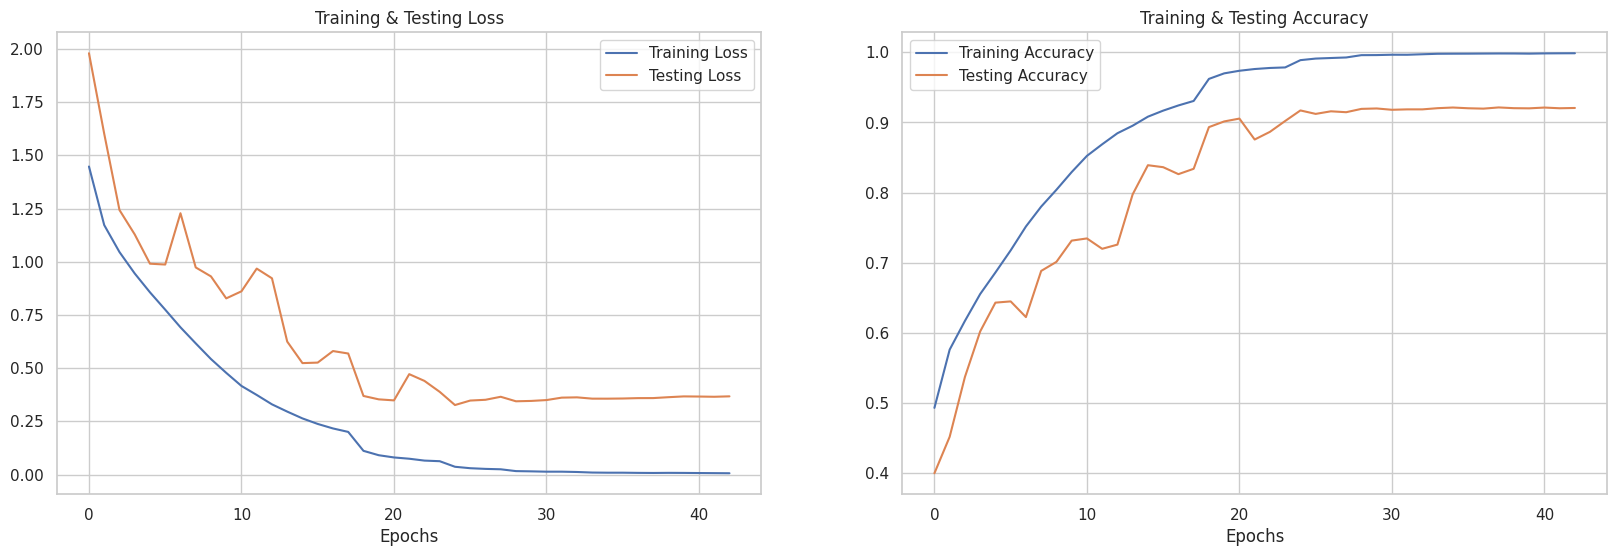

In [35]:
print("Accuracy of our model on test data : " , round(model.evaluate(x_test,y_test)[1]*100,2) , "%")

epochs = [i for i in range(43)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [36]:
from tensorflow.keras import layers, Sequential

model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(x_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(128, kernel_size=3, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=3, strides=2, padding="same"))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(14, activation="softmax"))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 58, 512)           3072      
                                                                 
 batch_normalization_9 (Bat  (None, 58, 512)           2048      
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 29, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 29, 256)           655616    
                                                                 
 batch_normalization_10 (Ba  (None, 29, 256)           1024      
 tchNormalization)                                               
                                                      

In [37]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp,earlystopping])

Epoch 1/50
1065/1065 [==============================] - 14s 11ms/step - loss: 1.4236 - accuracy: 0.4972 - val_loss: 2.0794 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 2/50
1065/1065 [==============================] - 11s 11ms/step - loss: 1.1345 - accuracy: 0.5825 - val_loss: 1.4437 - val_accuracy: 0.5149 - lr: 0.0010
Epoch 3/50
1065/1065 [==============================] - 11s 11ms/step - loss: 1.0012 - accuracy: 0.6297 - val_loss: 1.3838 - val_accuracy: 0.5356 - lr: 0.0010
Epoch 4/50
1065/1065 [==============================] - 12s 11ms/step - loss: 0.8914 - accuracy: 0.6697 - val_loss: 1.0469 - val_accuracy: 0.6169 - lr: 0.0010
Epoch 5/50
1065/1065 [==============================] - 11s 10ms/step - loss: 0.7890 - accuracy: 0.7118 - val_loss: 1.0895 - val_accuracy: 0.6204 - lr: 0.0010
Epoch 6/50
1065/1065 [==============================] - 11s 10ms/step - loss: 0.6926 - accuracy: 0.7487 - val_loss: 1.0725 - val_accuracy: 0.6484 - lr: 0.0010
Epoch 7/50
1065/1065 [========================

533/533 [==============================] - 2s 4ms/step - loss: 0.3644 - accuracy: 0.9296
Accuracy of our model on test data :  92.96 %


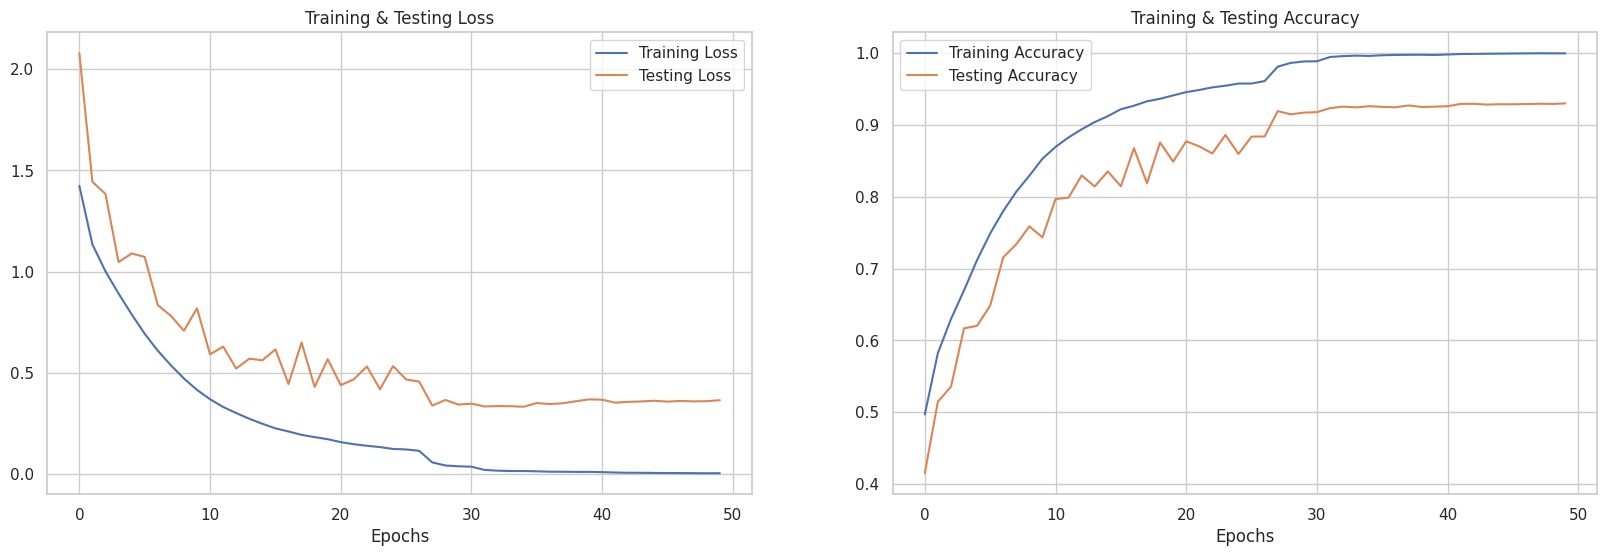

In [38]:
print("Accuracy of our model on test data : " , round(model.evaluate(x_test,y_test)[1]*100,2) , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [39]:
from tensorflow.keras import layers, Sequential

model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(x_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(128, kernel_size=3, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=3, strides=2, padding="same"))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(14, activation="softmax"))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 58, 512)           3072      
                                                                 
 batch_normalization_13 (Ba  (None, 58, 512)           2048      
 tchNormalization)                                               
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 29, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 29, 512)           1311232   
                                                                 
 batch_normalization_14 (Ba  (None, 29, 512)           2048      
 tchNormalization)                                               
                                                      

In [40]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp,earlystopping])

Epoch 1/50
1065/1065 [==============================] - 22s 15ms/step - loss: 1.4349 - accuracy: 0.4868 - val_loss: 1.9241 - val_accuracy: 0.4273 - lr: 0.0010
Epoch 2/50
1065/1065 [==============================] - 16s 15ms/step - loss: 1.1323 - accuracy: 0.5808 - val_loss: 1.6065 - val_accuracy: 0.4461 - lr: 0.0010
Epoch 3/50
1065/1065 [==============================] - 16s 15ms/step - loss: 0.9972 - accuracy: 0.6265 - val_loss: 1.1688 - val_accuracy: 0.5901 - lr: 0.0010
Epoch 4/50
1065/1065 [==============================] - 16s 15ms/step - loss: 0.8775 - accuracy: 0.6733 - val_loss: 1.0062 - val_accuracy: 0.6361 - lr: 0.0010
Epoch 5/50
1065/1065 [==============================] - 16s 15ms/step - loss: 0.7642 - accuracy: 0.7188 - val_loss: 0.9440 - val_accuracy: 0.6587 - lr: 0.0010
Epoch 6/50
1065/1065 [==============================] - 16s 15ms/step - loss: 0.6613 - accuracy: 0.7585 - val_loss: 0.9037 - val_accuracy: 0.6893 - lr: 0.0010
Epoch 7/50
1065/1065 [========================

533/533 [==============================] - 3s 5ms/step - loss: 0.4402 - accuracy: 0.9290
Accuracy of our model on test data :  92.9 %


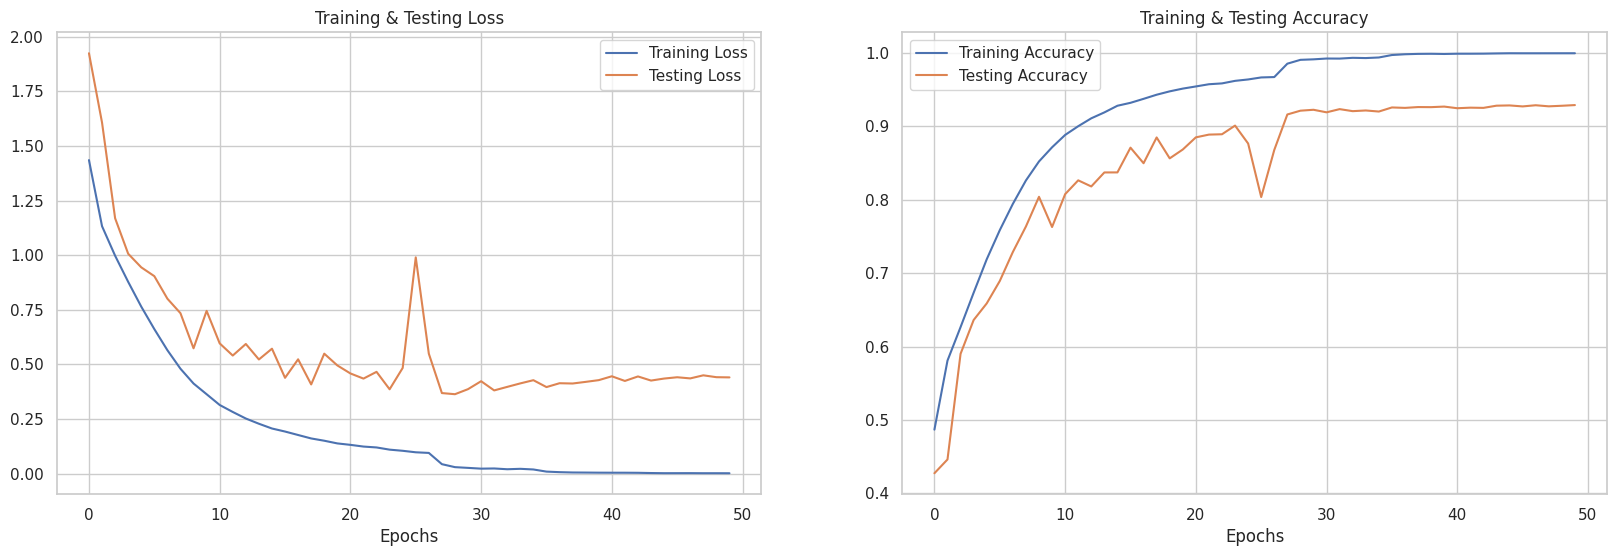

In [41]:
print("Accuracy of our model on test data : " , round(model.evaluate(x_test,y_test)[1]*100,2) , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [42]:
model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(x_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(14, activation="softmax"))


model.compile(optimizer = 'RMSprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 58, 512)           3072      
                                                                 
 batch_normalization_18 (Ba  (None, 58, 512)           2048      
 tchNormalization)                                               
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 29, 512)           0         
 ng1D)                                                           
                                                                 
 conv1d_14 (Conv1D)          (None, 29, 512)           1311232   
                                                                 
 batch_normalization_19 (Ba  (None, 29, 512)           2048      
 tchNormalization)                                               
                                                      

In [43]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp,earlystopping])

Epoch 1/50
1065/1065 [==============================] - 24s 19ms/step - loss: 1.4569 - accuracy: 0.4824 - val_loss: 1.3295 - val_accuracy: 0.5258 - lr: 0.0010
Epoch 2/50
1065/1065 [==============================] - 17s 16ms/step - loss: 1.1609 - accuracy: 0.5675 - val_loss: 1.6375 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 3/50
1065/1065 [==============================] - 17s 16ms/step - loss: 1.0375 - accuracy: 0.6107 - val_loss: 1.1053 - val_accuracy: 0.5960 - lr: 0.0010
Epoch 4/50
1065/1065 [==============================] - 17s 16ms/step - loss: 0.9331 - accuracy: 0.6515 - val_loss: 1.1272 - val_accuracy: 0.5903 - lr: 0.0010
Epoch 5/50
1065/1065 [==============================] - 18s 17ms/step - loss: 0.8314 - accuracy: 0.6898 - val_loss: 0.8781 - val_accuracy: 0.6729 - lr: 0.0010
Epoch 6/50
1065/1065 [==============================] - 17s 16ms/step - loss: 0.7302 - accuracy: 0.7286 - val_loss: 0.9084 - val_accuracy: 0.6737 - lr: 0.0010
Epoch 7/50
1065/1065 [========================

533/533 [==============================] - 4s 7ms/step - loss: 0.4342 - accuracy: 0.9290
Accuracy of our model on test data :  92.9 %


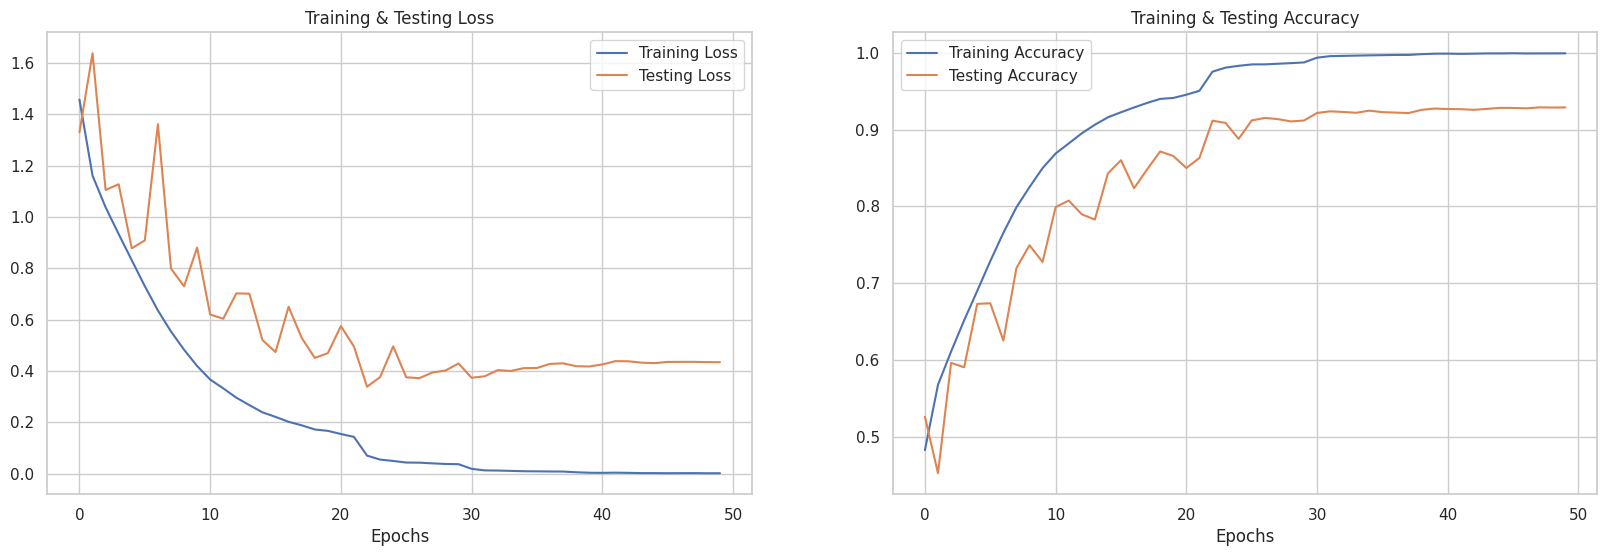

In [44]:
print("Accuracy of our model on test data : " , round(model.evaluate(x_test,y_test)[1]*100,2) , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()